# Trabalho 2 - Notebook

**TIAGO PEREIRA DALL'OCA - 206341**

In [241]:
from scipy import misc
from scipy import ndimage
from scipy.fft import ifftn
from scipy.spatial.distance import pdist
from scipy.ndimage import rotate
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [127]:
img = cv2.imread('images/baboon.png', cv2.IMREAD_GRAYSCALE)
img

array([[145,  55,  48, ..., 112, 153, 177],
       [116, 101,  39, ..., 129, 148, 125],
       [ 76, 114,  46, ..., 100,  88,  81],
       ...,
       [140, 145, 140, ...,  82,  89,  78],
       [155, 140, 131, ...,  78,  79,  69],
       [ 10,  11,  14, ...,   6,   3,   4]], dtype=uint8)

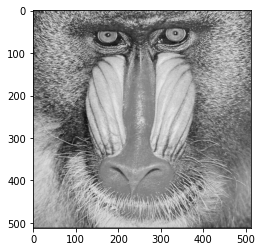

In [128]:
plt.imshow(img, 'gray')

In [129]:
img_fft = np.fft.fft2(img)
img_fft

array([[33855116.              +0.j        ,
         -785174.85239919 +281416.21459327j,
          484481.90213566 -208383.12512596j, ...,
         1105663.34276492  +90880.63244258j,
          484481.90213566 +208383.12512596j,
         -785174.85239919 -281416.21459327j],
       [ -341460.81266574 +213403.27187237j,
         1831854.99600104 -389789.22954937j,
           69254.33420955 +259025.70347688j, ...,
        -1351310.64325914 +214306.92234847j,
         -477693.14618373 +596090.63326166j,
          851038.31169955 +146985.2983906j ],
       [ -442818.45233343+2123140.02961668j,
         -741764.94980897 -606707.78868284j,
         -168958.88312021 -592502.17683079j, ...,
          673912.13878408 +159745.52260248j,
          211452.14232494 -769713.43869285j,
         -972603.0104075  -738162.03674212j],
       ...,
       [  104613.91600083 -685761.80904102j,
         -509045.97076516 +529992.11113627j,
          125165.69764356 -266954.97429208j, ...,
          103709.384

In [130]:
img_fft_log = np.log(1+np.abs(img_fft))
img_fft_log

array([[17.33760071, 13.63408953, 13.17570832, ..., 13.91932362,
        13.17570832, 13.63408953],
       [12.90585451, 14.44298116, 12.49920856, ..., 14.12900641,
        13.54616912, 13.66891033],
       [14.58969762, 13.77290125, 13.33120139, ..., 13.44819001,
        13.59015304, 14.01518117],
       ...,
       [13.4497897 , 13.50743685, 12.59419602, ..., 12.82055793,
        12.08033875, 13.52651465],
       [14.58969762, 14.01518117, 13.59015304, ..., 13.16426685,
        13.33120139, 13.77290125],
       [12.90585451, 13.66891033, 13.54616912, ..., 12.95870172,
        12.49920856, 14.44298116]])

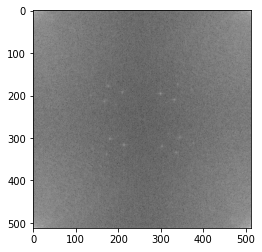

In [131]:
plt.imshow(img_fft_log, 'gray')

In [132]:
img_fft_shifted = np.fft.fftshift(img_fft)
img_fft_shifted

array([[-3226.           +0.j        , -1042.91975063-6158.6704388j ,
        -1840.3910511 +3276.23065036j, ...,
         6898.96587865-7756.11877215j, -1840.3910511 -3276.23065036j,
        -1042.91975063+6158.6704388j ],
       [-1904.7238326 +4221.87244066j, -3370.5776874 +1850.44848626j,
        -1651.49540528+3676.96928465j, ...,
         4971.4362287 -5140.79389298j,  -135.73415978 -850.32048205j,
          -16.86558726+1627.56687924j],
       [  227.23690009+3643.14318789j, -2815.30748002 +547.62951314j,
         2124.2629721 -1280.77496877j, ...,
         1995.90236542-2862.58058648j, -2638.04062306+1815.03648944j,
         -414.53135854  +10.56094736j],
       ...,
       [ 3181.13478538-2011.00300237j,   491.94802437+1197.79097783j,
         -582.23590916 +336.13388683j, ...,
        -1813.73600459+1926.55170349j,  5250.26909698+1530.95764262j,
         -483.54615666-1749.061832j  ],
       [  227.23690009-3643.14318789j,  -414.53135854  -10.56094736j,
        -2638.04062306

In [133]:
img_fft_shifted_log = np.log(1+np.abs(img_fft_shifted))

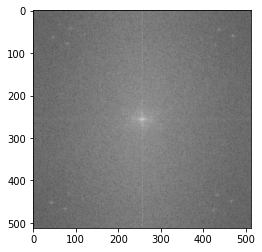

In [134]:
plt.imshow(img_fft_shifted_log, 'gray')

In [135]:
img_proc = np.fft.ifft2(img_fft)
img_proc

array([[145.+5.63091240e-15j,  55.-1.38777878e-15j,  48.+7.26155247e-15j,
        ..., 112.-9.27730115e-15j, 153.+1.11056997e-14j,
        177.-2.18922103e-15j],
       [116.-2.24473218e-15j, 101.-6.71684930e-15j,  39.-5.04110642e-15j,
        ..., 129.+4.08700851e-15j, 148.+7.04644676e-15j,
        125.+1.35655376e-15j],
       [ 76.+7.24073579e-15j, 114.+1.38777878e-15j,  46.-1.08350828e-14j,
        ..., 100.+1.46410661e-15j,  88.-1.70662096e-14j,
         81.-4.90926744e-15j],
       ...,
       [140.-1.74547876e-14j, 145.-8.82627305e-15j, 140.+3.23005511e-15j,
        ...,  82.+8.08381140e-15j,  89.-6.05418493e-15j,
         78.+6.90419943e-16j],
       [155.-1.66845704e-14j, 140.-2.79221091e-14j, 131.+9.03790931e-15j,
        ...,  78.+2.87964097e-15j,  79.+9.44036516e-15j,
         69.-1.17371390e-14j],
       [ 10.+1.59629254e-14j,  11.+9.49240686e-15j,  14.+1.49984192e-14j,
        ...,   6.+4.97518693e-15j,   3.+2.77208811e-15j,
          4.-5.90152927e-15j]])

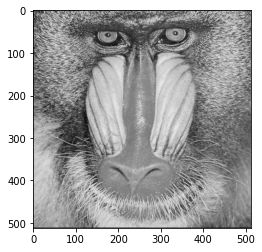

In [136]:
plt.imshow(np.abs(img_proc), 'gray')

---

## Filtros

In [155]:
def filtro(d,imgShape,i,o):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if pdist([[y,x],center])[0] < d:
                base[y,x] = i
            else:
                base[y,x] = o
    return base

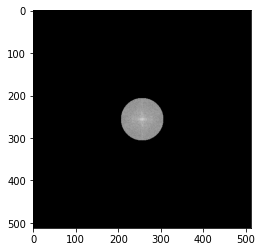

In [156]:
filtroPassaBaixo = filtro(50,img.shape,1,0)
plt.imshow(filtroPassaBaixo*img_fft_shifted_log, 'gray')

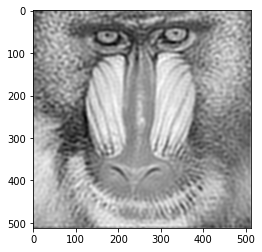

In [152]:
img_passa_baixo = np.abs(np.fft.ifft2(np.fft.ifftshift(filtroPassaBaixo*img_fft_shifted)))
plt.imshow(img_passa_baixo, 'gray')

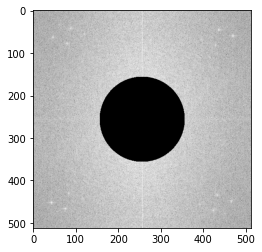

In [157]:
filtroPassaAlto = filtro(100,img.shape,0,1)
plt.imshow(filtroPassaAlto*img_fft_shifted_log, 'gray')

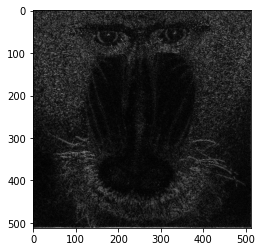

In [158]:
img_passa_baixo = np.abs(np.fft.ifft2(np.fft.ifftshift(filtroPassaAlto*img_fft_shifted)))
plt.imshow(img_passa_baixo, 'gray')

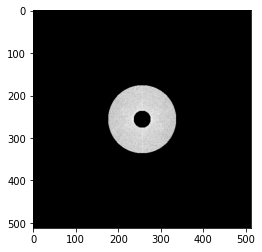

In [182]:
filtroPassaFaixa = filtro(80,img.shape,1,0)*filtro(20,img.shape,0,1)
plt.imshow(filtroPassaFaixa*img_fft_shifted_log, 'gray')

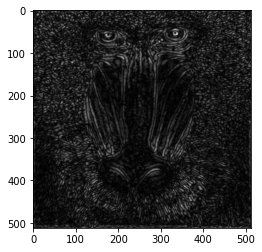

In [183]:
img_passa_baixo = np.abs(np.fft.ifft2(np.fft.ifftshift(filtroPassaFaixa*img_fft_shifted)))
plt.imshow(img_passa_baixo, 'gray')

In [237]:
img_fft_compressed1 = np.copy(img_fft)
img_fft_compressed2 = np.copy(img_fft)
np.clip(img_fft_compressed1.real, 5e4, None, out=img_fft_compressed1.real)
np.clip(img_fft_compressed1.imag, 5e4, None, out=img_fft_compressed1.imag)
np.clip(img_fft_compressed2.real, None, -5e4, out=img_fft_compressed2.real)
np.clip(img_fft_compressed2.imag, None, -5e4, out=img_fft_compressed2.imag)
img_fft_compressed = img_fft_compressed1 + img_fft_compressed2
img_fft_compressed

array([[ 3.38051160e+07      +0.j        ,
        -7.35174852e+05 +231416.21459327j,
         4.34481902e+05 -158383.12512596j, ...,
         1.05566334e+06  +40880.63244258j,
         4.34481902e+05 +158383.12512596j,
        -7.35174852e+05 -231416.21459327j],
       [-2.91460813e+05 +163403.27187237j,
         1.78185500e+06 -339789.22954937j,
         1.92543342e+04 +209025.70347688j, ...,
        -1.30131064e+06 +164306.92234847j,
        -4.27693146e+05 +546090.63326166j,
         8.01038312e+05  +96985.2983906j ],
       [-3.92818452e+05+2073140.02961668j,
        -6.91764950e+05 -556707.78868284j,
        -1.18958883e+05 -542502.17683079j, ...,
         6.23912139e+05 +109745.52260248j,
         1.61452142e+05 -719713.43869285j,
        -9.22603010e+05 -688162.03674212j],
       ...,
       [ 5.46139160e+04 -635761.80904102j,
        -4.59045971e+05 +479992.11113627j,
         7.51656976e+04 -216954.97429208j, ...,
         5.37093844e+04 -304897.16998088j,
         6.40689411

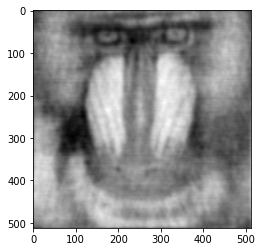

In [238]:
img_compressed = np.abs(np.fft.ifft2(img_fft_compressed))
plt.imshow(np.abs(img_compressed), 'gray')

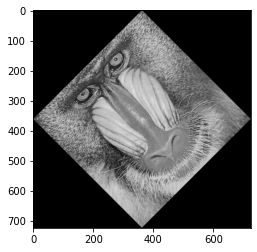

In [242]:
img_rot = rotate(img, 45)
plt.imshow(img_rot, 'gray')

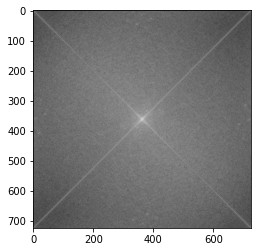

In [243]:
img_rot_fft = np.fft.fft2(img_rot)
img_rot_fft_shifted = np.fft.fftshift(img_rot_fft)
img_rot_fft_shifted_log = np.log(1+np.abs(img_rot_fft_shifted))
plt.imshow(img_rot_fft_shifted_log, 'gray')